# <center>        **Introduction to Data Science (S1-22_DSECLZG523)-ASSIGNMENT**</center>

## Group No

## Group Member Names:
1. Yateendra Kumar Tripathi - 2021sc04135@wilp.bits-pilani.ac.in
2.ishwar chandra tiwari - 2021sc04556@wilp.bits-pilani.ac.in
3.
4.

# 1. Business Understanding
 
Students are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?    
   4. What kind of analytics task are you performing?

Score: 1 Mark in total (0.25 mark each)

# Ans1

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
we are building a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).



# Ans2

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set is used to build our machine learning models. 
For the training set, we provide the outcome 
(also known as the “ground truth”) for each passenger. 
our model will be based on “features” like passengers’ gender and class.

The test set is used to see how well our model performs on unseen data. 
For the test set, we do not have the ground truth for each passenger. 


Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# Ans3

# Ans4

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

import numpy as np
from sklearn.feature_selection import mutual_info_classif, chi2

from sklearn.metrics import classification_report,confusion_matrix

import scikitplot as skplt
import matplotlib.pyplot as plt

# 2. Data Acquisition
 
For the problem identified , find an appropriate data set (Your data set must 
be unique) from any public data source.

---



## 2.1 Download the data directly



In [3]:
##---------Type the code below this line------------------##

In [4]:
ti = pd.read_csv('train.csv')

In [5]:
test = pd.read_csv('test.csv')

## 2.2 Code for converting the above downloaded data into a dataframe

In [24]:
##---------Type the code below this line------------------##

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [25]:
##---------Type the code below this line------------------##

In [6]:
ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
ti.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [28]:
##---------Type the code below this line------------------##

In [8]:
ti.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

Score: 2 Marks in total (0.25 marks for 2.1, 0.25 marks for 2.2, 0.5 marks for 2.3, 0.25 marks for 2.4, 0.75 marks for 2.5)

# 1

In [9]:
print(ti.shape)

(891, 12)


# 2

In [10]:
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3

<AxesSubplot: >

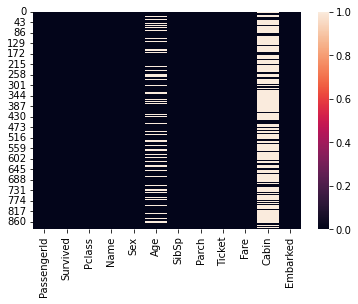

In [11]:
sns.heatmap(ti.isnull())

# 3. Data Preparation

using column transformer for 3.1 , 3.2 , 3.3

## 3.1 Check for 

* duplicate data
* missing data
* data inconsistencies


In [34]:
##---------Type the code below this line------------------##

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [35]:
##---------Type the code below this line------------------##

In [71]:
ti.drop_duplicates(subset=None, keep='first', inplace=False)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.00000,1,0,7.2500,1,0,1
2,1,1,38.00000,1,0,71.2833,0,0,0
3,1,3,26.00000,0,0,7.9250,0,0,1
4,1,1,35.00000,1,0,53.1000,0,0,1
5,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,3,39.00000,0,5,29.1250,0,1,0
888,1,1,19.00000,0,0,30.0000,0,0,1
889,0,3,25.14062,1,2,23.4500,0,0,1


In [12]:
ti.set_index('PassengerId',drop=True,inplace=True)
ti.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)

In [15]:
def imputeAge(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass==1:
            return ti[ti['Pclass']==1]['Age'].mean()
        elif pclass==2:
            return ti[ti['Pclass']==2]['Age'].mean()
        else:
            return ti[ti['Pclass']==3]['Age'].mean()
        
    else:
        return age

In [16]:
ti['Age'] = ti[['Age','Pclass']].apply(imputeAge,axis = 1)

## 3.3 Encode categorical data

In [39]:
##---------Type the code below this line------------------##

In [17]:
ti = pd.get_dummies(data=ti,columns=['Sex','Embarked'],drop_first=True)

## 3.4 Text data

1. Remove special characters
2. Change the case (up-casing and down-casing).
3. Tokenization — process of discretizing words within a document.
4. Filter Stop Words.

In [40]:
##---------Type the code below this line------------------##

In [41]:
##---------Type the code below this line------------------##

## 3.4 Report

Mention and justify the method adopted 
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

Score: 2 Marks (based on the dataset you have, the data prepreation you had to do and report typed, marks will be distributed between 3.1, 3.2, 3.3 and 3.4)

In [42]:
##---------Type the code below this line------------------##

In [43]:
##---------Type the code below this line------------------##

## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

Score: 1 Mark

In [44]:
##---------Type the code below this line------------------##

In [18]:
X = ti.drop('Survived',axis=1)
y = ti['Survived']

# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark

In [46]:
##---------Type the code below this line------------------##

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification. 
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

In [47]:
##---------Type the code below this line------------------##

# 5. Data Wrangling



## 5.1 Univariate Filters 

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>two</b>) 

#### For Text data

1. Stemming / Lemmatization.
2. Forming n-grams and storing them in the document vector.
3. TF-IDF
(From the above 2 you are required to use only any <b>two</b>)


Score: 3 Marks

# Mutual Information (Information Gain)

In [19]:
mi_scores = mutual_info_classif(X, y, discrete_features=True, random_state=42)

# Create a dataframe to store the scores
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values('MI Score', ascending=False)

# Display the top 5 features with highest MI score
print(mi_scores_df.head(5))

    Feature  MI Score
4      Fare  0.302990
5  Sex_male  0.150870
1       Age  0.078055
0    Pclass  0.058107
2     SibSp  0.023197


/Users/monakuwolf/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/Users/monakuwolf/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


# Chi-Squared test

In [20]:
chi_scores, p_values = chi2(X, y)

# Create a dataframe to store the scores
chi_scores_df = pd.DataFrame({'Feature': X.columns, 'Chi-Squared Score': chi_scores})
chi_scores_df = chi_scores_df.sort_values('Chi-Squared Score', ascending=False)

# Display the top 5 features with highest Chi-Squared score
print(chi_scores_df.head(5))

    Feature  Chi-Squared Score
4      Fare        4518.319091
5  Sex_male          92.702447
0    Pclass          30.873699
1       Age          13.524238
3     Parch          10.097499


In [ ]:
##---------Type the code below this line------------------##

## 5.2 Report observations

Write your observations from the results of each method. Clearly justify your choice of the method.

Score 1 mark

In [ ]:
##---------Type the code below this line------------------##

# 6. Implement Machine Learning Techniques

Use any 2 ML algorithms

A clear justification have to be given for why a certain algorithm was chosen to address your problem.

Score: 4 Marks (2 marks each for each algorithm)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 6.1 ML technique 1 + Justification

In [ ]:
##---------Type the code below this line------------------##


In [22]:
ml1 = DecisionTreeClassifier()

## 6.2 ML technique 2 + Justification

In [23]:
##---------Type the code below this line------------------##

In [44]:
ml2 = RandomForestClassifier(n_estimators=150)

In [45]:
ml1.fit(X_train,y_train)
ml2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [46]:
pred_ml1 = ml1.predict(X_test)
pred_ml2 = ml2.predict(X_test)

In [64]:
d1 = {
    'index':X_test.index,
    'prediction':pred_ml1
}

pred_1 = pd.DataFrame(d1)

In [65]:
d2 = {
    'index':X_test.index,
    'prediction':pred_ml2
}

pred_2 = pd.DataFrame(d2)

## 7. Conclusion 

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.

Score 1 Mark

In [ ]:
##---------Type the code below this line------------------##

# For model1

In [48]:
print(classification_report(y_test,pred_ml1))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       168
           1       0.75      0.67      0.71       100

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



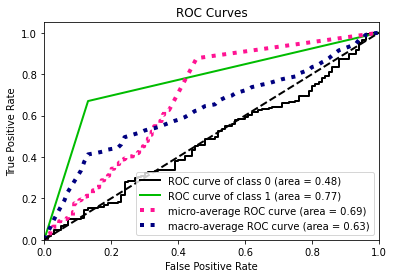

In [68]:
skplt.metrics.plot_roc(y_test, pred_1)
plt.show()

# For model2

In [49]:
print(classification_report(y_test,pred_ml2))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       168
           1       0.77      0.74      0.76       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



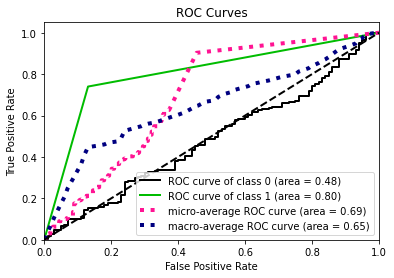

In [69]:
skplt.metrics.plot_roc(y_test, pred_2)
plt.show()

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

--------------Type the answers below this line--------------

##NOTE
All Late Submissions will incur a penalty of -2 marks. Do ensure on time submission to avoid penalty.

Good Luck!!!